In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather=pd.read_csv('C:\\Users\\bharg\\Desktop\\Bhargav\seattle-weather.csv')
weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
weather.duplicated().sum()

0

In [4]:
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
# weather data doesnot have any duplicate and null values

In [6]:
numerical=[fea for fea in weather.columns if weather[fea].dtypes!=object]
numerical

['precipitation', 'temp_max', 'temp_min', 'wind']

In [7]:
categorical=[fea for fea in weather.columns if weather[fea].dtypes==object]
categorical

['date', 'weather']

In [8]:
weathernumerical=weather[numerical]
weathernumerical

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [9]:
weathercategorical=weather[categorical]
weathercategorical

,date,weather
0,2012-01-01,drizzle
1,2012-01-02,rain
2,2012-01-03,rain
3,2012-01-04,rain
4,2012-01-05,rain
...,...,...
1456,2015-12-27,rain
1457,2015-12-28,rain
1458,2015-12-29,fog
1459,2015-12-30,sun


In [10]:
# data classified into numerical data and categorical data

In [11]:
# logistic regression codes

In [12]:
x=weathernumerical[['temp_max','temp_min']]
x

,temp_max,temp_min
0,12.8,5.0
1,10.6,2.8
2,11.7,7.2
3,12.2,5.6
4,8.9,2.8
...,...,...
1456,4.4,1.7
1457,5.0,1.7
1458,7.2,0.6
1459,5.6,-1.0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lm=LabelEncoder()

In [15]:
weathercategorical['weather']=lm.fit_transform(weathercategorical['weather'])

C:\Users\bharg\AppData\Local\Temp\ipykernel_13836\236405058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weathercategorical['weather']=lm.fit_transform(weathercategorical['weather'])


In [16]:
list(lm.classes_)

['drizzle', 'fog', 'rain', 'snow', 'sun']

In [17]:
y=weathercategorical['weather']
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=12)

In [20]:
from collections import Counter
Counter(y_train)

Counter({4: 466, 2: 434, 1: 63, 0: 42, 3: 17})

# This is Balanced data

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr=LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

C:\Users\bharg\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr.score(x_train,y_train)

0.684931506849315

In [25]:
lr.score(x_test,y_test)

0.6856492027334852

In [26]:
y_prediction=lr.predict(x_test)
y_prediction

array([2, 4, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2,
       4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4,
       2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm=confusion_matrix(y_test,y_prediction)
cm

array([[  0,   0,   4,   0,   7],
       [  0,   0,  14,   0,  24],
       [  0,   0, 161,   0,  46],
       [  0,   0,   6,   0,   3],
       [  0,   0,  32,   2, 140]], dtype=int64)

<Axes: xlabel='predicted class', ylabel='True class'>

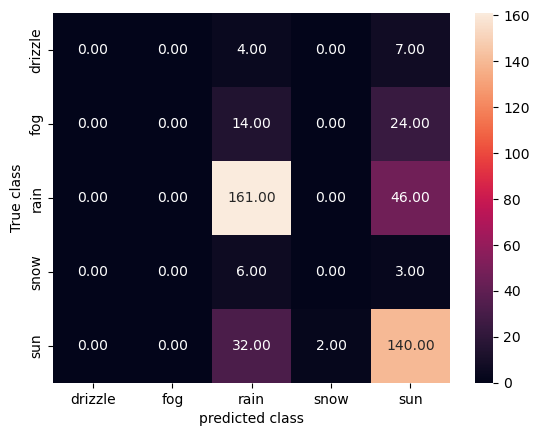

In [29]:
heatmap=sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['drizzle', 'fog', 'rain', 'snow', 'sun'],yticklabels=['drizzle', 'fog', 'rain', 'snow', 'sun'])
plt.xlabel('predicted class')
plt.ylabel('True class')
heatmap

# In this above heatmap 161 is true positive because predicted rain and true rain both are correct.
# In the above heatmap 140 is also true positive because predicted sun and true sun both are correct.
# In the above heatmap more lighter color indicates more true positive and more darker color indicates false positive.
# In the above heatmap more darker color indicates false positive where predicted category is yes but actually it's incorrect.